# Hw1, Byoungsoo Kim

In [243]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from matplotlib import cm

In [59]:
# functions to compute variables at a given time point
def prediction(t,w,u):
    
    v_t = np.sum([w[tau]*u[t-tau] for tau in range(t+1)])
    
    return v_t

def prediction_error(t,r,v):
    if t+1 == len(v):
        d_t = r[t]
    else:
        d_t = r[t]+v[t+1]-v[t]

    return d_t

def delta_weight(tau,t,d,u,e):

    d_w_tau = e*d[t]*u[t-tau]

    return d_w_tau

In [448]:
def TD_learning(u_t,r_t,sigma,lrn_rate,n_trials,stochastic=False,p=0.5,gaussian=False):
    """
    input
    u_t: time of the stimulus
    r_t: time of the reward
    sigma: std of gaussian filter
    lrn_rate: learning rate
    n_trials: number of iterations
    stochastic: whether to use the stochastic input, default: False
    p: Bernoulli probability, default: 0.5
    gaussian: whether to use the gaussian filter for the reward or not, default: False

    output
    u: array of stimulus over time
    r: array of reward over time
    results: array of prediction, weight, prediction error over time
    """
    # defining variables
    T = 250 # ms # total time
    u = np.zeros(T) # stimulus
    v = np.zeros(T) # prediction
    r = np.zeros(T) # reward
    w = np.zeros(T) # weight
    d = np.zeros(T) # prediction error
    e = lrn_rate # learning rate
    
    # initialize stimulus
    u[u_t] = 1
    
    # initialize reward with a gaussian envelope
    if stochastic == False:
        r[r_t] = 2
        if gaussian == True:
            r = gaussian_filter(r,sigma=sigma)
    
    # temporal difference learning
    n_trials = n_trials
    results = np.zeros((3,T,n_trials)) # for v, w, d
    for i in range(n_trials):
        if stochastic == True:
            r = np.zeros(T)
            # for the stochastic reward, I used Bernoulli process
            if np.random.random_sample() <= p:
                r[r_t] = 2
                if gaussian == True:
                    r = gaussian_filter(r,sigma=sigma)
            else:
                r[r_t] = 0
        for t in range(T):
            v[t] = prediction(t,w,u)
            d[t] = prediction_error(t,r,v)
            for tau in range(t):
                w[tau] = w[tau] + delta_weight(tau,t,d,u,e)
        results[0,:,i] = v
        results[1,:,i] = w
        results[2,:,i] = d
    
    return u,r,results

In [449]:
# regenerating Figure 9.2
def plot_Fig9_2(u,r,results):
    # regenerating Figure 9.2A
    fig, ax = plt.subplots(subplot_kw={"projection":"3d"},figsize=(4,4))

    n_trials = len(results[0,0,:]);
    X = np.arange(0,T,1);
    Y = np.arange(0,n_trials//20,1);
    X, Y = np.meshgrid(X,Y)
    
    surf = ax.plot_surface(X,Y,results[2,X,[y*20 for y in Y]],cmap="viridis",linewidth=0,rstride=1,cstride=1) # did not use all y for the visualization purpose
    ax.view_init(20, -70)
    ax.set_xlabel("t")
    ax.set_ylabel("trials")
    ax.yaxis.labelpad=-10
    ax.set_yticks([])
    ax.set_zlabel("$\delta$",rotation=90)
    ax.zaxis.labelpad=-5
    ax.set_zticks([0,np.round(np.max(results[0,:,-1]))]);

    # regenerating Figure 9.2B
    fig = plt.figure(figsize = (5,4))
    
    ax = fig.add_subplot(5,2,1)
    ax.plot(u)
    ax.set_ylabel("u")
    ax.set_title("before")
    ax.set_xticks([])
    ax.set_ylim(-0.1,1.2)
    ax = fig.add_subplot(5,2,3)
    ax.plot(r)
    ax.set_ylabel("r")
    ax.set_xticks([])
    ax.set_ylim(-0.1,2.2)
    ax = fig.add_subplot(5,2,5)
    ax.plot(results[0,:,0])
    ax.set_ylim(-1,2.2)
    ax.set_ylabel("v")
    ax.set_xticks([])
    ax = fig.add_subplot(5,2,7)
    ax.plot(np.diff(results[0,:,0]))
    ax.set_ylim(-1,2.2)
    ax.set_ylabel("$\Delta$ v")
    ax.set_xticks([])
    ax = fig.add_subplot(5,2,9)
    ax.plot(results[2,:,0])
    ax.set_ylim(-1,2.2)
    ax.set_xlabel("t")
    ax.set_ylabel("$\delta$")
    
    ax = fig.add_subplot(5,2,2)
    ax.plot(u)
    ax.set_title("after")
    ax.set_xticks([])
    ax.set_ylim(-0.1,1.2)
    ax = fig.add_subplot(5,2,4)
    ax.plot(r)
    ax.set_ylim(-0.1,2.2)
    ax.set_xticks([])
    ax = fig.add_subplot(5,2,6)
    ax.plot(results[0,:,-1])
    ax.set_ylim(-1,max(2,np.round(np.max(results[0,:,-1]))+0.2));
    ax.set_yticks([0,max(2,np.round(np.max(results[0,:,-1])))])
    ax.set_xticks([])
    ax = fig.add_subplot(5,2,8)
    ax.plot(np.diff(results[0,:,-1]))
    ax.set_ylim(min(-1,np.floor(np.min(np.diff(results[0,:,-1])))-0.2),max(2,np.round(np.max(results[0,:,-1]))+0.2));
    ax.set_yticks([min(0,np.floor(np.min(np.diff(results[0,:,-1])))),max(2,np.round(np.max(results[0,:,-1])))])
    ax.set_xticks([])
    ax = fig.add_subplot(5,2,10)
    ax.plot(results[2,:,-1])
    ax.set_ylim(-1,max(2,np.round(np.max(results[2,:,-1]))+0.2));
    ax.set_yticks([0,max(2,np.round(np.max(results[2,:,-1])))])
    ax.set_xlabel("t");

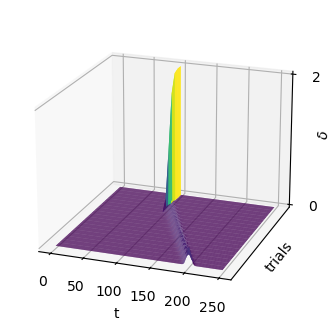

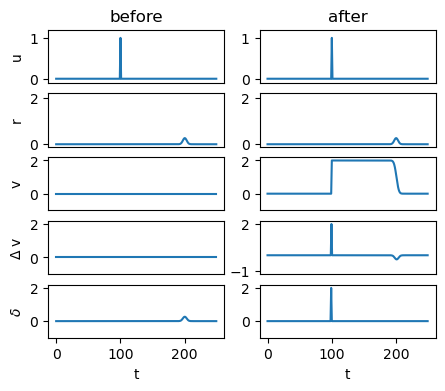

In [464]:
# regenerating Fig9.2
u0,r0,results0 = TD_learning(100,200,3,0.5,400,gaussian=True)
plot_Fig9_2(u0,r0,results0)

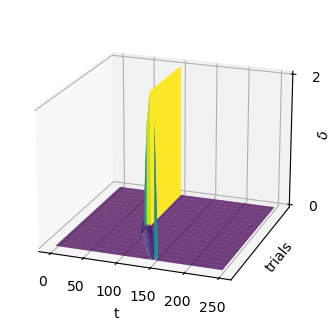

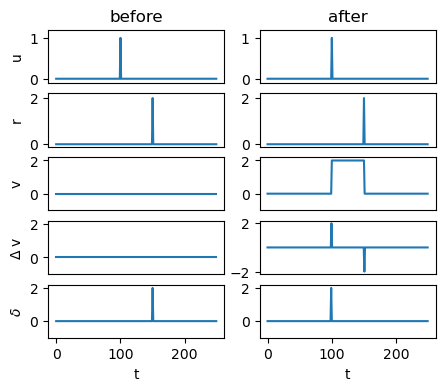

In [451]:
# first let's change timing between the stimulus and the reward
u1,r1,results1 = TD_learning(100,150,3,0.5,400) # stimulus at 100, reward at 150
plot_Fig9_2(u1,r1,results1)

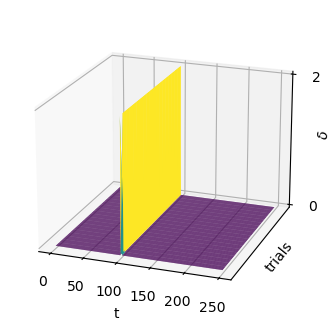

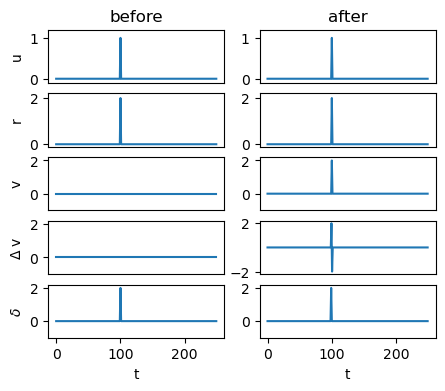

In [452]:
u2,r2,results2 = TD_learning(100,100,3,0.5,400) # stimulus at 100, reward at 100
plot_Fig9_2(u2,r2,results2)

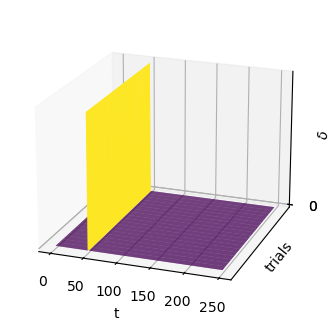

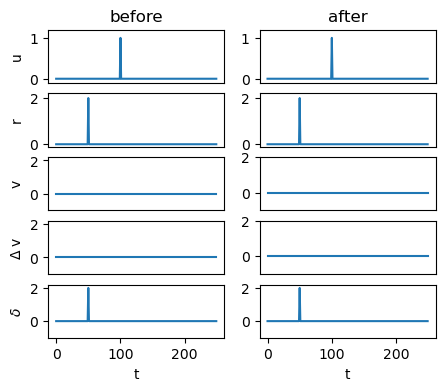

In [453]:
u3,r3,results3 = TD_learning(100,50,3,0.5,400) # stimulus at 100, reward at 50
plot_Fig9_2(u3,r3,results3)

In [454]:
# to show that as the difference of the timing decreases, the model learns faster, calculation
learn_trial = np.zeros(len(np.arange(100,-20,-20)));
for (i,r_t) in enumerate(np.arange(100,-20,-20)):
    u,r,results = TD_learning(100,100+r_t,3,0.5,400) # stimulus at 100, reward at r_t
    learn_trial[i] = np.argmax(results[2,99,:])

Text(0, 0.5, 'N trials')

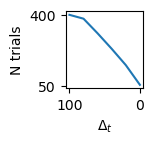

In [455]:
# to show that as the difference of the timing decreases, the model learns faster, visualization
fig,ax = plt.subplots(figsize=(1,1))
plt.plot(learn_trial)
ax.set_xticks([0,5],labels=["100","0"])
ax.set_yticks([50,400])
ax.set_xlabel("$\Delta_t$")
ax.set_ylabel("N trials")

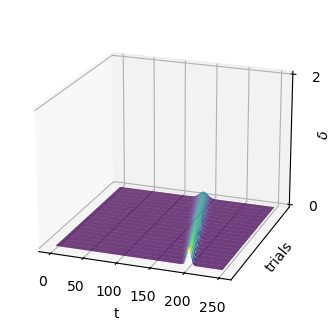

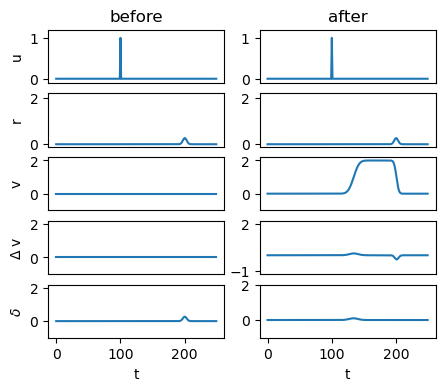

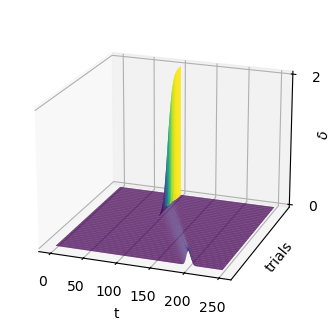

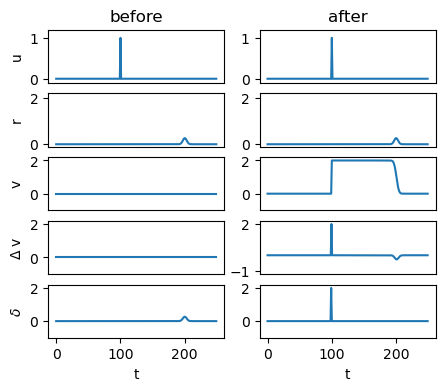

In [456]:
# second, let's change the learning rate
u4,r4,results4 = TD_learning(100,200,3,0.2,400,gaussian=True) # learning rate = 0.2
plot_Fig9_2(u4,r4,results4)
u4,r4,results4 = TD_learning(100,200,3,0.2,800,gaussian=True) # learning rate = 0.2, n_trials = 800
plot_Fig9_2(u4,r4,results4)

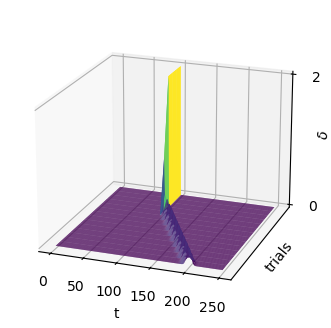

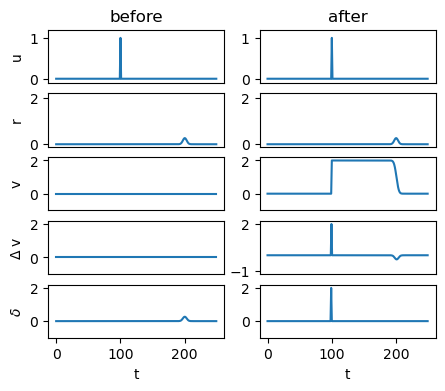

In [457]:
u5,r5,results5 = TD_learning(100,200,3,1,300,gaussian=True) # learning rate = 1, n_trials = 300
plot_Fig9_2(u5,r5,results5)

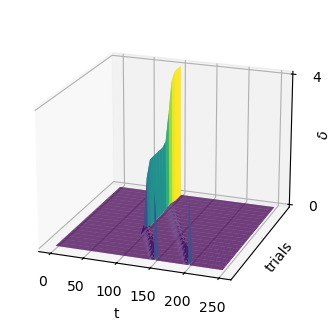

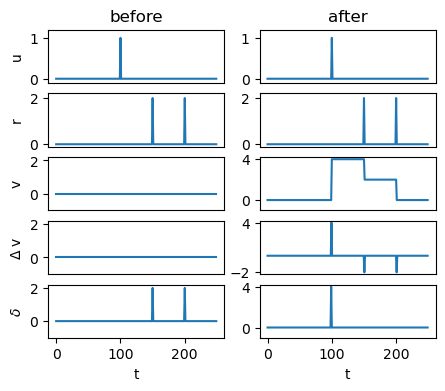

In [459]:
# third, let's give multiple rewards
u6,r6,results6 = TD_learning(100,[150,200],3,0.5,400) # reward at 150 and 200
plot_Fig9_2(u6,r6,results6)

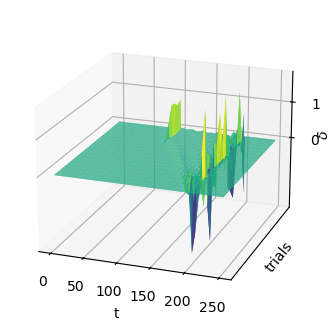

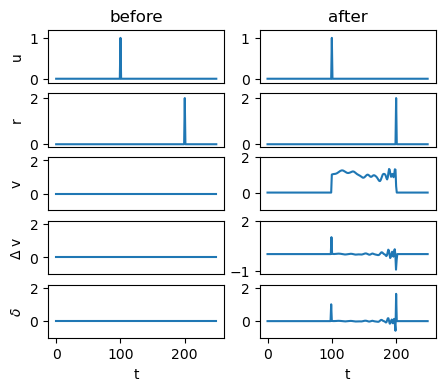

In [492]:
# fourth, let's give stochastic rewards
u7,r7,results7 = TD_learning(100,200,3,0.5,400,stochastic=True,p=0.5) # reward with 50% probability
plot_Fig9_2(u7,r7,results7)

In [490]:
# to check the tendendcy of the prediction error between p and set of iterations
prediction_error_all = np.zeros((4,20))
for (i,p) in enumerate([0.25,0.5,0.75,1]):
    for n in range(20):
        u7,r7,results7 = TD_learning(100,200,3,0.5,400,stochastic=True,p=p) # reward with 50% probability
        prediction_error_all[i,n] = results7[2,99,-1]

Text(0.5, 0, 'set of trials')

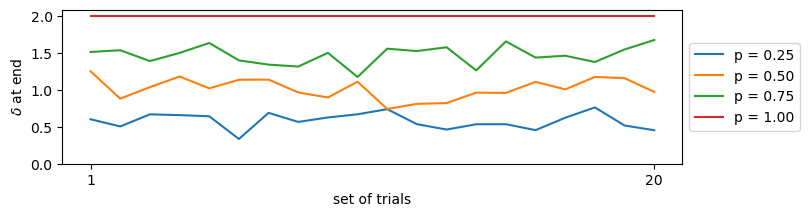

In [491]:
fig,ax = plt.subplots(figsize=(8,2))
for (i,p) in enumerate([0.25,0.5,0.75,1]):
    plt.plot(prediction_error_all[i,:],label="p = {:.2f}".format(p))
    
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xticks([0,19],labels=["1","20"])
ax.set_yticks([0,0.5,1,1.5,2])
ax.set_ylabel("$\delta$ at end")
ax.set_xlabel("set of trials")